### Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Data structure min priority queue with statistics

## Data structure for storing keys with their respective priorities

In [1]:
class Node:
    def __init__(self, name_input, prio_input):
        self.name = name_input
        self.prio = prio_input

## Storage for elements of min priority queue

In [2]:
# Heap
elements = []
heapsize = 0
# non-Heap
nonheap_elements = []
nonheap_size = 0

## Helper functions for easier access to children/parents of a given element in heap

In [3]:
def parent(i):
    return (i-1)//2 # "//" means division with floor function (round down)

def left(i):
    return 2*i +1

def right(i):
    return 2*i +2

## Keeping count of statistics

In [4]:
# Statistics for heap implementation
amt_key_comparisons = 0
key_comparisons_per_operation = []
# Statistics for array implementation not using the heap data structure 
nonheap_amt_key_comparisons = 0
nonheap_key_comparisons_per_operation = []
# Keeping track of indices to highlight
extraction_indices, reduction_indices = [], []
# For displayed the averages
avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation = [], []

## Constants for visualization

In [5]:
COL_HEAP = 'tomato'
COL_NONHEAP = 'tab:blue'
COL_EXTRACTION = 'forestgreen'
COL_REDUCTION = 'tab:pink'

## Function to calculate the average per operation

In [6]:
def calculate_average():
    global avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation
    for i, amt in enumerate(key_comparisons_per_operation):
         avg_comparisons_per_operation.append(amt/(i+1))   
    for i, amt in enumerate(nonheap_key_comparisons_per_operation):
         nonheap_avg_comparisons_per_operation.append(amt/(i+1))

## Function to reset min priority queue

In [7]:
def reset_pq():
    global elements, heapsize, nonheap_elements, nonheap_size
    global amt_key_comparisons, nonheap_amt_key_comparisons, key_comparisons_per_operation, nonheap_key_comparisons_per_operation
    global avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation
    global extraction_indices, reduction_indices
    # For the implementation
    elements, heapsize = [], 0
    nonheap_elements, nonheap_size = [], 0
    # Counting comparisons
    amt_key_comparisons, nonheap_amt_key_comparisons = 0, 0
    key_comparisons_per_operation, nonheap_key_comparisons_per_operation = [], []
    # Averaging the outcome
    avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation = [], []
    # Keeping track at which point an extraction or reduction is occuring as opposed to insertions (for visualization)
    extraction_indices, reduction_indices = [], []

## Implementation of a min priority queue (statistics)

In [8]:
def insert_key(name_input, prio_input):
    global elements, heapsize
    elements.append(Node(name_input, float('inf'))) # float('inf') = positive infinity
    heap_decrease_key(heapsize, prio_input)
    heapsize += 1   
            
def heap_decrease_key(i, prio_input):
    global elements, amt_key_comparisons      
    elements[i].prio = prio_input
    while i > 0 and elements[parent(i)].prio > elements[i].prio:
        amt_key_comparisons += 1
        elements[i], elements[parent(i)] = elements[parent(i)], elements[i]
        i = parent(i)
    if i != 0: # in case that it is not appended, it also checks the prio of the element smaller than itself
        amt_key_comparisons += 1
        
def extract_min():
    global elements, heapsize, amt_key_comparisons   
    min_element = elements[0]
    heapsize -= 1
    elements[0], elements[heapsize] = elements[heapsize], elements[0] # Swaps first element and last element to delete the previous first and bubble down the previous last
    elements = elements[:heapsize] # Deletes last element
    min_heapify(0)
        
def min_heapify(i):
    global elements, heapsize, amt_key_comparisons
    l = left(i)
    r = right(i)   
    if l < heapsize and elements[l].prio < elements[i].prio:
        minimum = l
        amt_key_comparisons += 1
    else:
        minimum = i
        amt_key_comparisons += 1
    if r < heapsize and elements[r].prio < elements[minimum].prio:
        minimum = r
    if r < heapsize: # Key comparison only happens when the index is not already out of range
        amt_key_comparisons += 1
    if minimum != i: # Index comparison. not a key comparison
        elements[i], elements[minimum] = elements[minimum], elements[i]
        min_heapify(minimum)
    
def reduce_priority(name_input, new_prio):
    global elements   
    key_found = False  
    for index, element in enumerate(elements):
        if element.name == name_input:
            key_found = True
            at_index = index
            break          
    if not key_found:
        return
    heap_decrease_key(at_index,new_prio)

## Implementation of a min priority queue not using a heap structure (statistics)

In [9]:
def nonheap_insert_key(name_input, prio_input):
    global nonheap_elements, nonheap_size, nonheap_amt_key_comparisons
    name_already_exists = False
    for element in nonheap_elements:
        if element.name == name_input:
            name_already_exists = True
    if not name_already_exists:
        i = 0
        if nonheap_size == 0:
            nonheap_elements.append(Node(name_input, prio_input))
            nonheap_size += 1
            return
        while i < nonheap_size and nonheap_elements[i].prio < prio_input:
            nonheap_amt_key_comparisons += 1
            i += 1
                
        if i < nonheap_size: # In case that it is not appended, it also checks the prio of the element bigger than itself
            nonheap_amt_key_comparisons += 1        
        nonheap_elements.insert(i,Node(name_input, prio_input))
        nonheap_size += 1
            
def nonheap_reduce_priority(name_input, new_prio):
    global nonheap_elements   
    key_found = False  
    for index, element in enumerate(nonheap_elements):
        if element.name == name_input:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        return     
    if nonheap_elements[at_index].prio <= new_prio: 
        return
    nonheap_adjust_priority(at_index, new_prio)
    
def nonheap_adjust_priority(at_index, new_prio):
    global nonheap_elements, nonheap_size, nonheap_amt_key_comparisons
    temp = nonheap_elements[at_index]
    temp.prio = new_prio
    del nonheap_elements[at_index] # Deletes temp from array
    nonheap_size -= 1
    i = 0
    if nonheap_size == 0:
        nonheap_elements.append(Node(temp.name, temp.prio))
        nonheap_size += 1
    while i < nonheap_size and nonheap_elements[i].prio < new_prio:
        i += 1
        nonheap_amt_key_comparisons += 1
    if i == nonheap_size: # In case it is appended, there isnt one more check
        nonheap_amt_key_comparisons += 1 # Checks once more than it executes
    nonheap_elements.insert(i,Node(temp.name, temp.prio))
    nonheap_size += 1
    
def nonheap_extract_min():
    global nonheap_elements, nonheap_size
    if nonheap_size < 1:
        return
    min_element = nonheap_elements[0]
    nonheap_elements = nonheap_elements[1:]
    nonheap_size -= 1

## Functions which call both implementations so that they may be compared on equal inputs

In [10]:
import random

def stat_reduce_priority():
    # Choosing which element to reduce to what new priority (random)
    to_be_reduced = elements[random.randint(0, len(elements)-1)]
    lowerlimit = 0
    upperlimit = to_be_reduced.prio - 1
    if lowerlimit >= upperlimit: # Example: Something is reduced twice: Once from 1 to 0 and then once again. Since it has to decrease, it must become negative
        lowerlimit = upperlimit - 1 # Makes sure that there is always a valid range of options for the random integer function
    reduced_to = random.randrange(lowerlimit, upperlimit)
    # Now the operation itself
    reduce_priority(to_be_reduced.name, reduced_to)
    nonheap_reduce_priority(to_be_reduced.name, reduced_to)
    key_comparisons_per_operation.append(amt_key_comparisons)
    nonheap_key_comparisons_per_operation.append(nonheap_amt_key_comparisons) 

def stat_insert_key(name_input, prio_input):
    insert_key(name_input, prio_input)
    nonheap_insert_key(name_input, prio_input)
    key_comparisons_per_operation.append(amt_key_comparisons)
    nonheap_key_comparisons_per_operation.append(nonheap_amt_key_comparisons)

def stat_extract_min():
    extract_min()
    nonheap_extract_min()
    key_comparisons_per_operation.append(amt_key_comparisons)
    nonheap_key_comparisons_per_operation.append(nonheap_amt_key_comparisons)  

## Function that takes data as input and produces a graphical output

In [11]:
import matplotlib.pyplot as plt
def visualize(total_operation_indices, heapdata, nonheapdata, labelstrings, overall_average = False):   
    plt.figure(figsize=(20, 12))
    # heap data
    plt.plot(total_operation_indices, heapdata, color=COL_HEAP, label = 'heap', linewidth=5.0)
    plt.scatter(total_operation_indices, heapdata, color=COL_HEAP, s=150)
    # non-heap data
    plt.plot(total_operation_indices, nonheapdata, color=COL_NONHEAP, label = 'non-heap', linewidth=5.0)
    plt.scatter(total_operation_indices, nonheapdata, color=COL_NONHEAP, s=150)
    # Extraction data 
    if extraction_indices:
        heap_extraction_values_at_indices = []
        lin_extraction_values_at_indices = []
        for i in extraction_indices:
            heap_extraction_values_at_indices.append(heapdata[i-1]) # i - 1 since extraction_indices start at 1 while regular indices start at 0
            lin_extraction_values_at_indices.append(nonheapdata[i-1])
        plt.scatter(extraction_indices, heap_extraction_values_at_indices, color=COL_EXTRACTION, label='key extractions', s=300, zorder=4)
        plt.scatter(extraction_indices, lin_extraction_values_at_indices, color=COL_EXTRACTION, s=300, zorder=4) # zorder=10 makes those scatter points be at the foreground
    # Reduction data
    if reduction_indices:
        heap_reduction_values_at_indices = []
        lin_reduction_values_at_indices = []
        for i in reduction_indices:
            heap_reduction_values_at_indices.append(heapdata[i-1]) # i - 1 since reduction_indices start at 1 while regular indices start at 0
            lin_reduction_values_at_indices.append(nonheapdata[i-1])
        plt.scatter(reduction_indices, heap_reduction_values_at_indices, color=COL_REDUCTION, label='key priority reductions', s=300, zorder=4)
        plt.scatter(reduction_indices, lin_reduction_values_at_indices, color=COL_REDUCTION, s=300, zorder=4) 
    # Tick fontsize
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Title and axes labels
    plt.title(labelstrings[0], fontsize=25)   
    if overall_average: # In case you want to show the "average of the averages" in a single number
        sumofheapdata = 0
        for num in heapdata:
            sumofheapdata += num
        avg_heap = amt_key_comparisons / len(heapdata)
        sumofnonheapdata = 0
        for num in nonheapdata:
            sumofnonheapdata += num
        avg_nonheap = nonheap_amt_key_comparisons / len(nonheapdata)
        if avg_heap < avg_nonheap:
            betterone = "heap"
            advantageinpercent = round(((avg_heap / avg_nonheap * 100) -100)*-1, 2)
        else:
            betterone = "non-heap"
            advantageinpercent = round(((avg_nonheap / avg_heap * 100) -100)*-1, 2) 
        plt.xlabel(labelstrings[1] + "\nOverall average: " + str(round(avg_heap, 2)) + " for heap and " + str(round(avg_nonheap, 2)) 
                   + " for non-heap per operation for " + str(len(heapdata)) + " operations" + "\n" + betterone + " is " + str(advantageinpercent) + "% cheaper (better)", fontsize=20)
    else:
        plt.xlabel(labelstrings[1], fontsize=20)
    plt.ylabel(labelstrings[2], fontsize=20)
    plt.grid(True) # Figured it'd be better with grid on
    plt.legend(fontsize=30)
    plt.show()

## Worst Case (WC) for non-heap implementation, Best Case (BC) for heap (Inserting in ascending order)

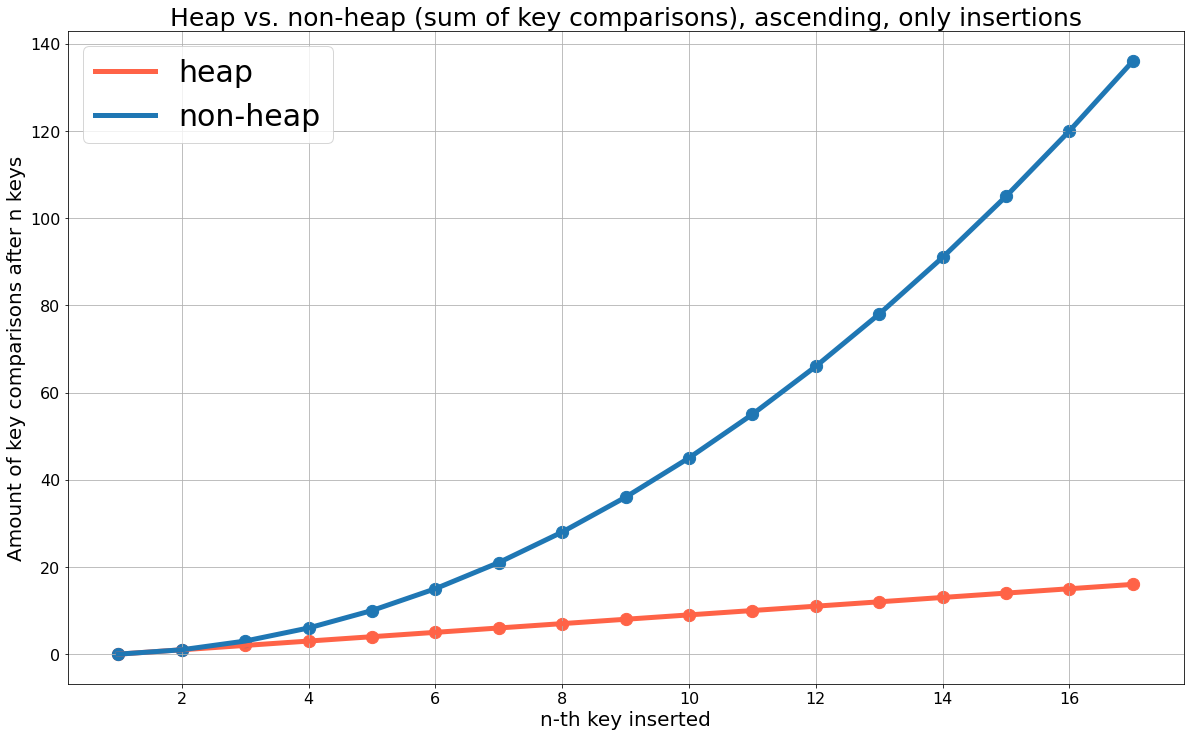

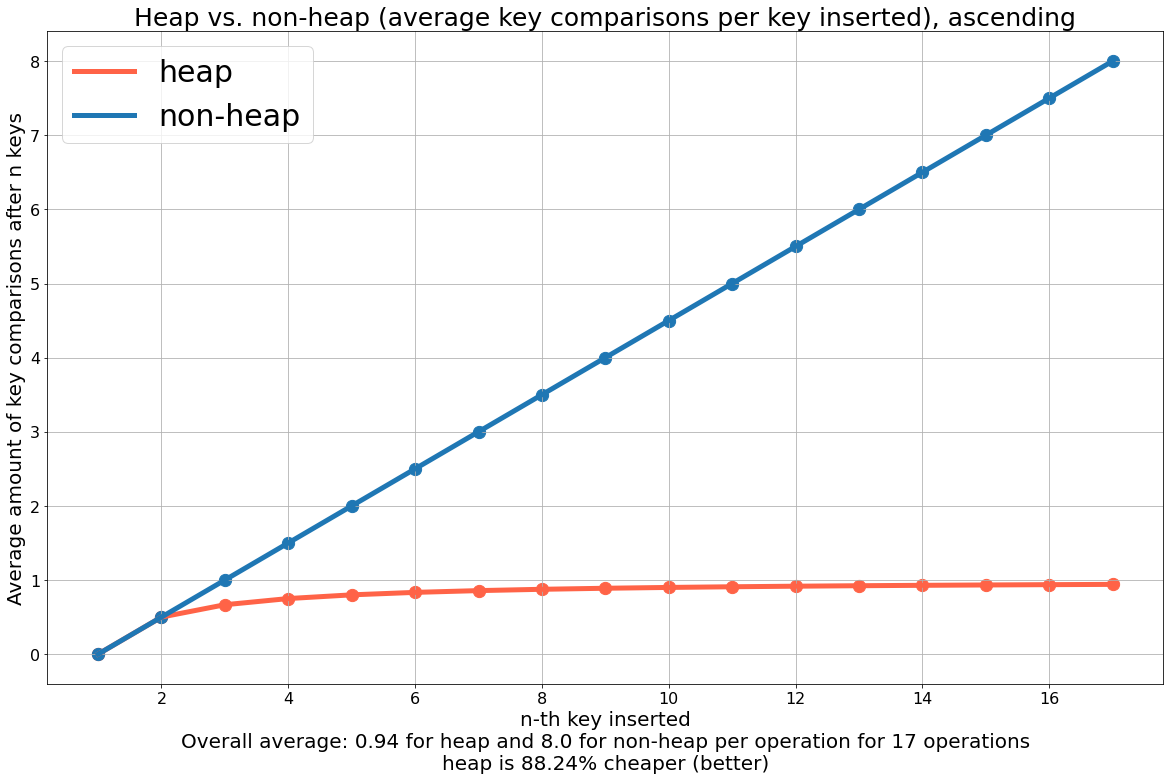

In [12]:
####################
n = 17 # Amount of elements to be inserted in ascending order, feel free to change
####################

insertions = list(range(1, n+1))
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))

labelstrings = ["Heap vs. non-heap (sum of key comparisons), ascending, only insertions", "n-th key inserted", "Amount of key comparisons after n keys"]
visualize(amt_keys_inserted, key_comparisons_per_operation, nonheap_key_comparisons_per_operation, labelstrings)

####################### Above overall sum, below average per insert

calculate_average()
   
labelstring = ["Heap vs. non-heap (average key comparisons per key inserted), ascending", "n-th key inserted", "Average amount of key comparisons after n keys"]
visualize(amt_keys_inserted, avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation, labelstring, overall_average = True)

reset_pq() # Resets data for next test (ignore)

## BC for non-heap implementation, WC for heap (Inserting in descending order)

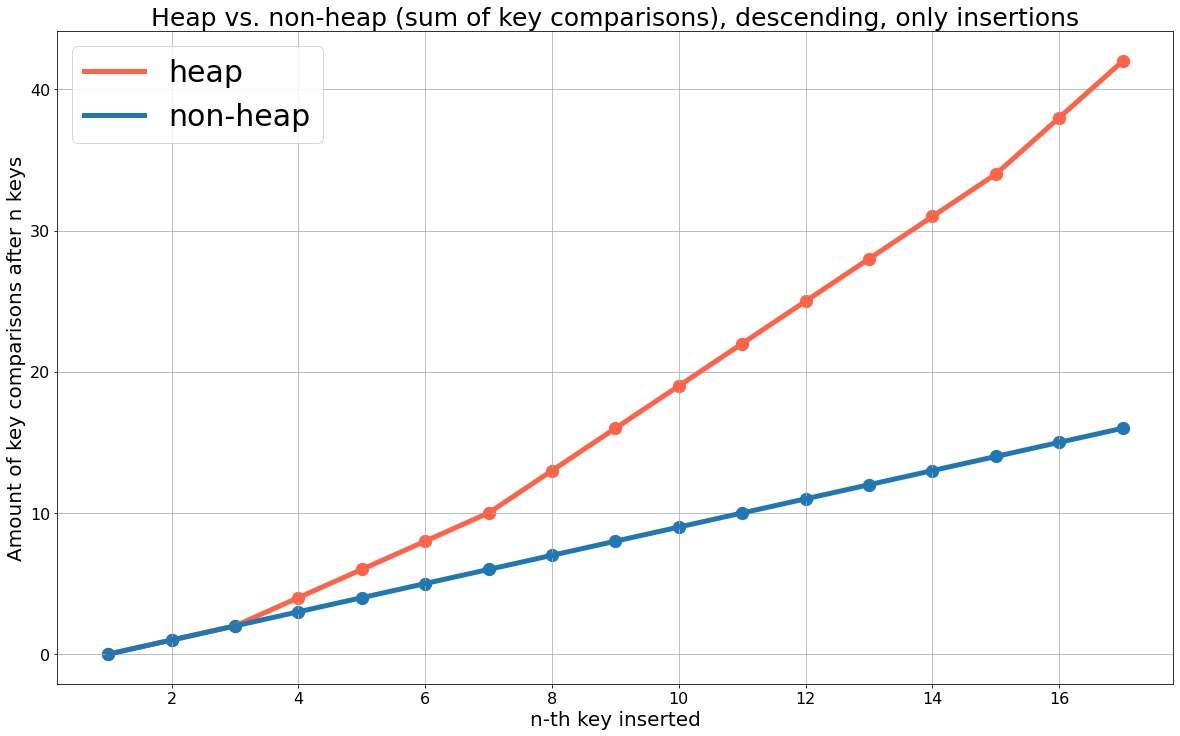

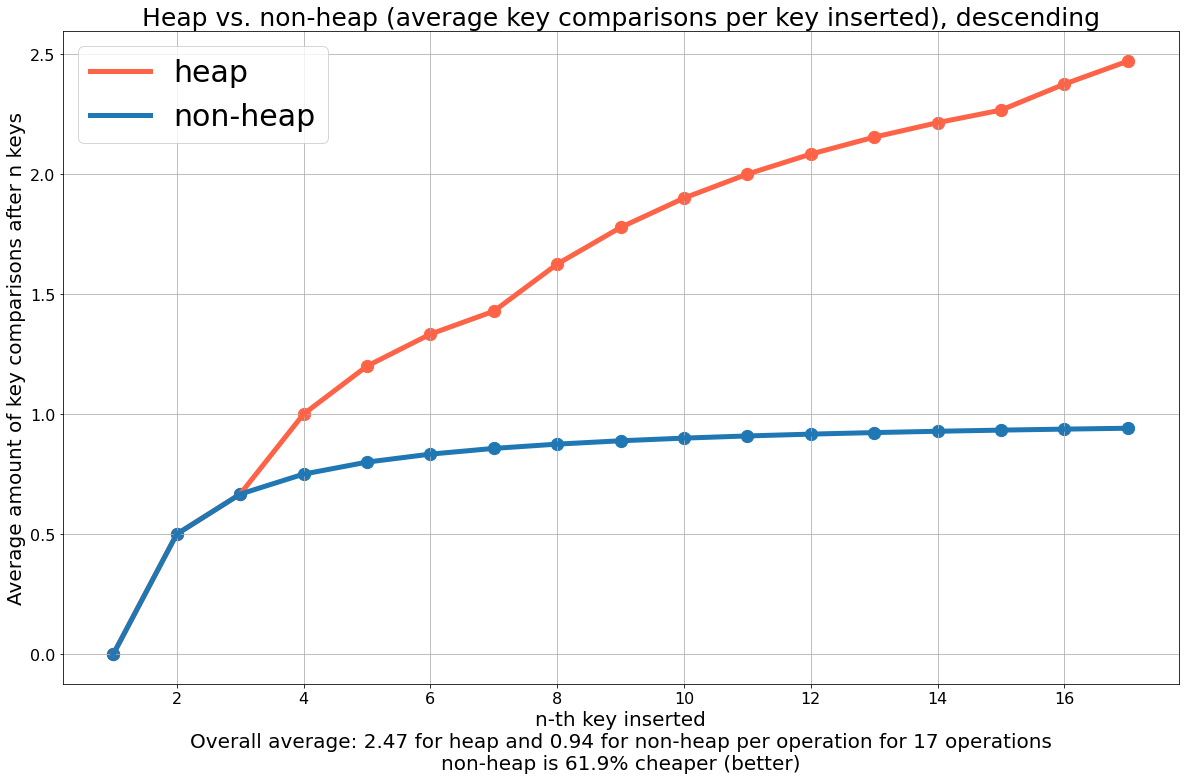

In [13]:
####################
n = 17 # Amount of elements to be inserted in descending order, feel free to change
####################

insertions = list(range(1, n+1))
insertions.reverse()
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))
    
labelstrings = ["Heap vs. non-heap (sum of key comparisons), descending, only insertions", "n-th key inserted", "Amount of key comparisons after n keys"]
visualize(amt_keys_inserted, key_comparisons_per_operation, nonheap_key_comparisons_per_operation, labelstrings)

####################### Above overall sum, below average per insert

calculate_average()
    
labelstring = ["Heap vs. non-heap (average key comparisons per key inserted), descending", "n-th key inserted", "Average amount of key comparisons after n keys"]
visualize(amt_keys_inserted, avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation, labelstring, overall_average = True)

reset_pq()

## "Average Case" simulated with a random permutation of numbers 1 through n being inserted

Order of elements being inserted (priority): [4, 17, 14, 6, 3, 16, 10, 5, 13, 12, 15, 9, 8, 11, 1, 2, 7]


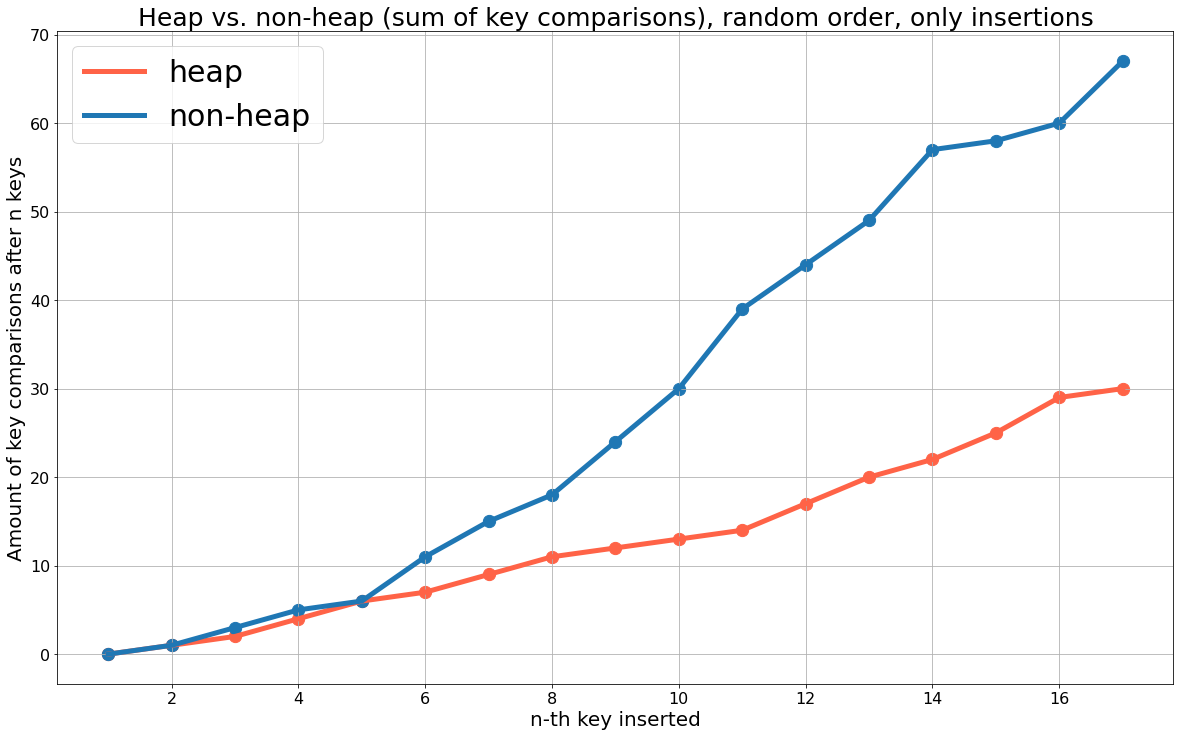

Order of elements being inserted (priority): [4, 17, 14, 6, 3, 16, 10, 5, 13, 12, 15, 9, 8, 11, 1, 2, 7]


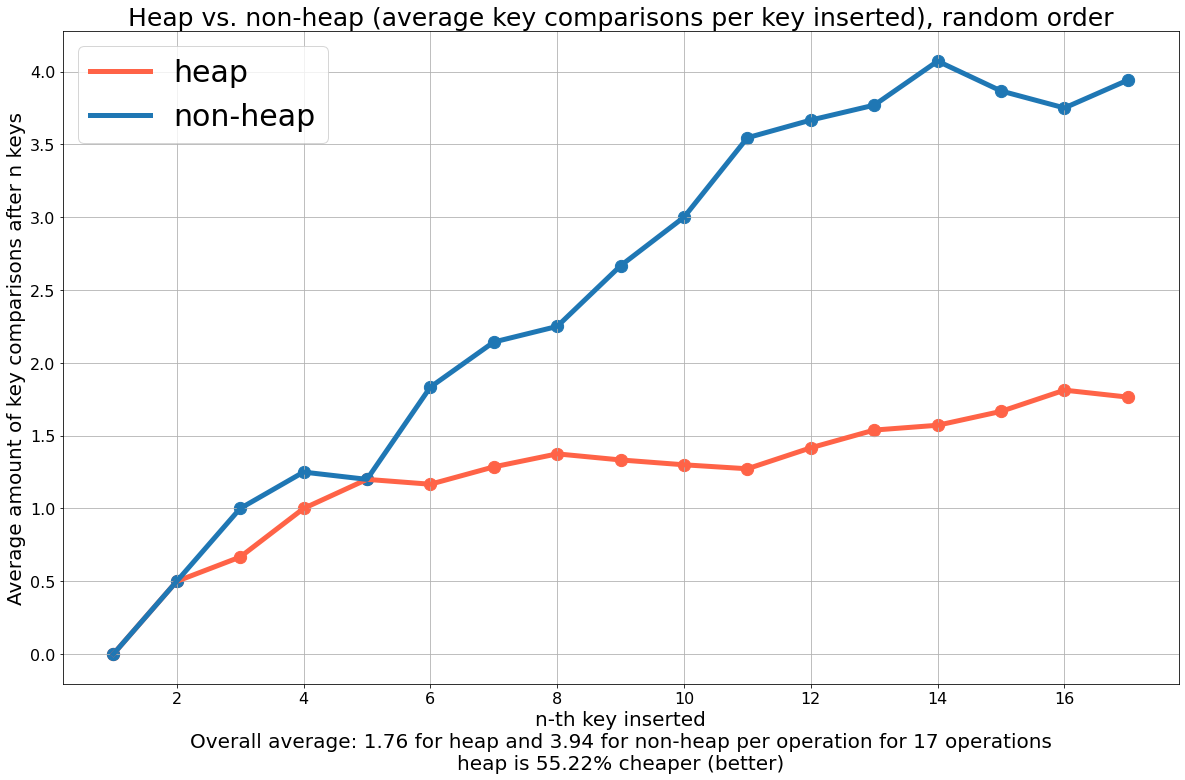

In [14]:
from random import shuffle
####################
n = 17 # Amount of numbers to be inserted in random order, feel free to change
####################

insertions = list(range(1, n+1))   
shuffle(insertions) # random permutation
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))
 
print("Order of elements being inserted (priority):", insertions)

labelstrings = ["Heap vs. non-heap (sum of key comparisons), random order, only insertions", "n-th key inserted", "Amount of key comparisons after n keys"]
visualize(amt_keys_inserted, key_comparisons_per_operation, nonheap_key_comparisons_per_operation, labelstrings)

####################### Above overall sum, below average per insert

calculate_average()
    
print("Order of elements being inserted (priority):", insertions)

labelstring = ["Heap vs. non-heap (average key comparisons per key inserted), random order", "n-th key inserted", "Average amount of key comparisons after n keys"]
visualize(amt_keys_inserted, avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation, labelstring, overall_average = True)

reset_pq()

## Function which prevents underflows caused by randomness

In [15]:
# e.g "insert-insert-extract" is a legal combination of operations, while its permutation "extract-insert-insert" is not due to Underflow. This Function prevents cases like that 
# and changes the permutation to be a legal. If possible
def make_sure_it_works(operations, amt_inserts, amt_extracts, amt_reductions):
    if amt_extracts > amt_inserts:
        print("\nERROR: Too many extractions, Underflow!")
        return
    if amt_inserts - amt_extracts < amt_reductions + 1:
        print("\nERROR: Too many reductions, Underflow!")
        return
    amt_elements = 0
    for index,j in enumerate(operations):
        if j == 0: # If it is an extraction
            amt_elements -= 1
        elif j != -1: # If it is an insertion
            amt_elements += 1      
        if amt_elements <= 0:
            swapindex = index
            while swapindex < len(operations)-1:
                swapindex += 1
                if operations[swapindex] != 0 and operations[swapindex] != -1:
                    break
            operations[index], operations[swapindex] = operations[swapindex], operations[index]
            if j == 0:
                amt_elements += 2 # Because it prevents an extraction and replaces/swaps places with an insertion
            else:
                amt_elements += 1 # Because it swaps a reduction with an insertion

## The same random permutation as before but including extract_min and reduce_key

Order of elements being inserted (priority), 0 for extraction, -1 for reduction: [2, -1, 12, 0, 1, 8, 11, 6, 3, 0, 5, 7, 4, 9, -1, 10, 0, 13, 14, 15, -1]


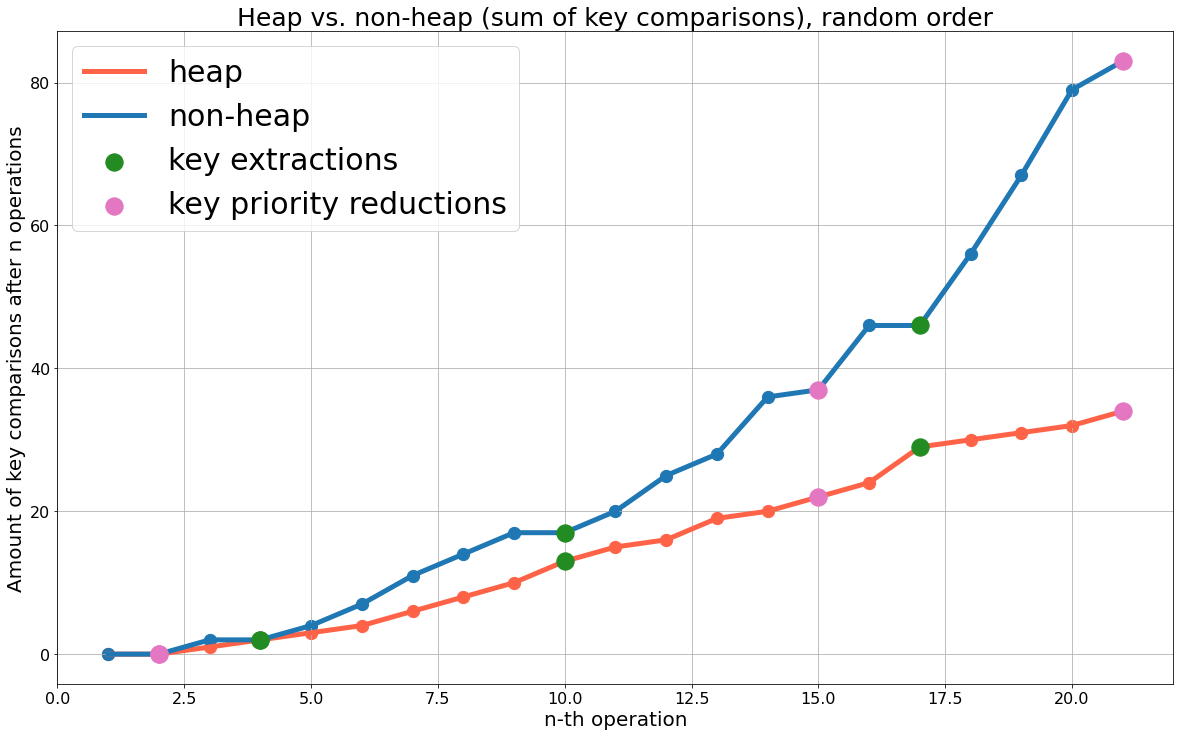

Order of elements being inserted (priority), 0 for extraction, -1 for reduction: [2, -1, 12, 0, 1, 8, 11, 6, 3, 0, 5, 7, 4, 9, -1, 10, 0, 13, 14, 15, -1]


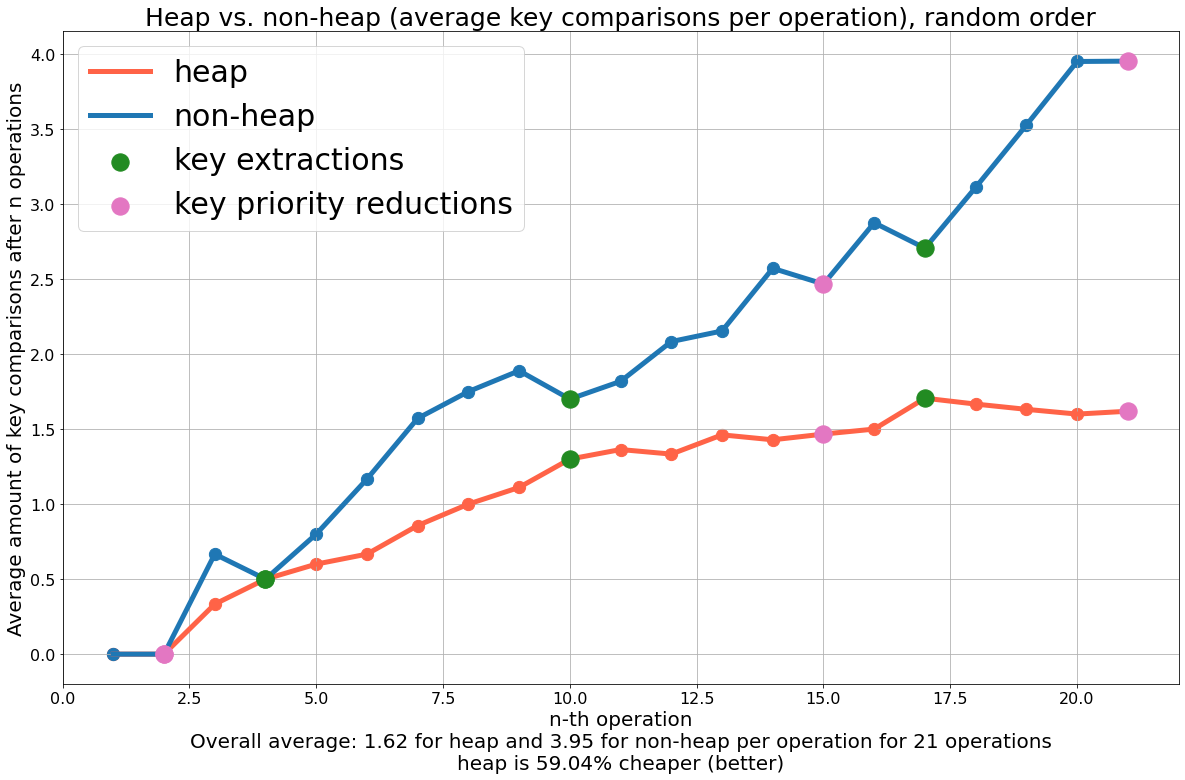

In [16]:
from random import shuffle
####################
n = 15 # Amount of elements to be extracted, feel free to change this aswell as extractions and key_reductions.
extractions = 3 # Amount of extractions. Note that it may not be higher than the amount of elements inserted
key_reductions = 3 # Amount of key_priority_reductions (decrease_key)
####################

operations = list(range(1, n+1))
for _ in range(1, extractions+1):
    operations.append(0)
for _ in range(1, key_reductions+1):
    operations.append(-1)
shuffle(operations)
make_sure_it_works(operations, n, extractions, key_reductions)
for index,j in enumerate(operations):
    if j == 0:
        stat_extract_min()
        extraction_indices.append(index+1) # For graphical highlighting
    elif j == -1:
        stat_reduce_priority()
        reduction_indices.append(index+1)
    else:
        stat_insert_key(str(j), j)
amt_operations = list(range(1, len(operations)+1))
print("Order of elements being inserted (priority), 0 for extraction, -1 for reduction:", operations)

labelstrings = ["Heap vs. non-heap (sum of key comparisons), random order", "n-th operation", "Amount of key comparisons after n operations"]
visualize(amt_operations, key_comparisons_per_operation, nonheap_key_comparisons_per_operation, labelstrings)

####################### Above overall sum, below average per insert

calculate_average()
   
print("Order of elements being inserted (priority), 0 for extraction, -1 for reduction:", operations)

labelstring = ["Heap vs. non-heap (average key comparisons per operation), random order", "n-th operation", "Average amount of key comparisons after n operations"]
visualize(amt_operations, avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation, labelstring, overall_average = True)

reset_pq()

In [17]:
user_operations = 0
def user_insert_multiple(user_elements_to_insert=[]):
    for name_input, prio_input in user_elements_to_insert:
        user_insert_key(name_input, prio_input)

def user_reduce_priority(to_be_reduced_name, reduced_to):
    global user_operations
    reduce_priority(to_be_reduced_name, reduced_to)
    nonheap_reduce_priority(to_be_reduced_name, reduced_to)
    reduction_indices.append(user_operations+1)
    user_operations += 1
    key_comparisons_per_operation.append(amt_key_comparisons)
    nonheap_key_comparisons_per_operation.append(nonheap_amt_key_comparisons) 

def user_insert_key(name_input, prio_input):
    global user_operations
    user_operations += 1
    stat_insert_key(name_input, prio_input)

def user_extract_min():
    global user_operations
    if heapsize <= 0:
        print("\nERROR: Underflow")
        return
    extraction_indices.append(user_operations+1)
    user_operations += 1
    stat_extract_min()

## Your tests go here...

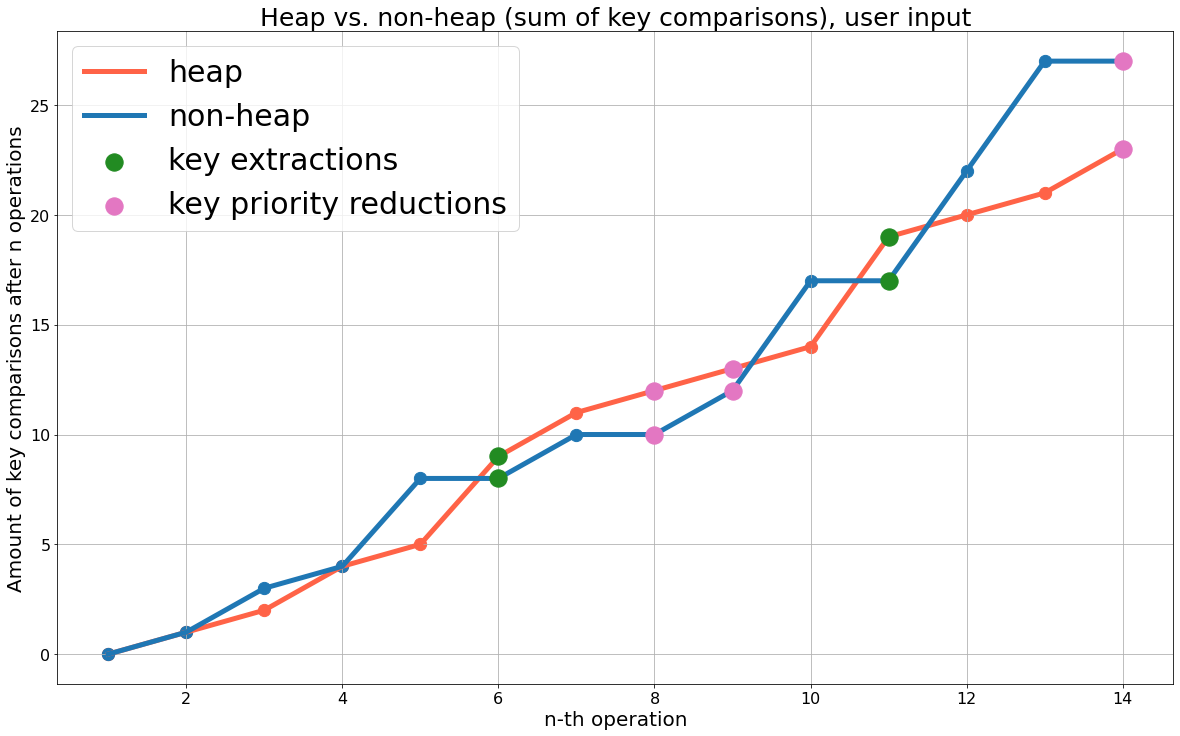

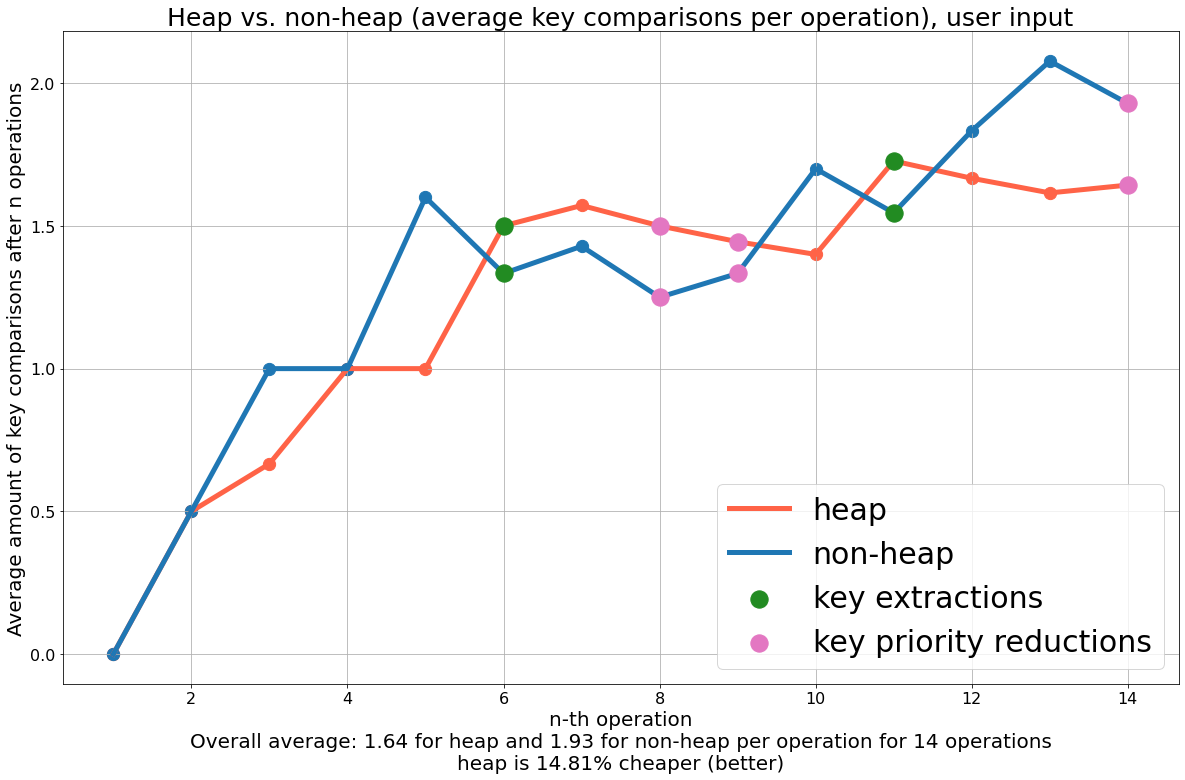

In [18]:
# Pretty much the same syntax as in the other two Jupyter Notebooks but with a "user_" prefix attatched to all the operations.
# Ignore everything outside the box consisting of '#'s
# Keep in mind that quality algorithms scale as efficiently as possible, which the non-heap implementation does not. 
# Meaning that even if for say 5 or a dozen of operations the non-heap implementation might have an edge over the heap implementation, 
# the difference shifts in favor of the heap with increased amount of operations. 
######################################################################################
user_elements_to_insert = [('A', 4), ('B', 2), ('C', 6), ('D', 1), ('E', 7)]
user_insert_multiple(user_elements_to_insert)

user_extract_min()

user_insert_key('F', 3)

user_reduce_priority('F', 1)

user_reduce_priority('C', 3)

user_insert_key('G', 5)

user_extract_min()

user_insert_key('H', 8)

user_insert_key('I', 6)

user_reduce_priority('H', 2)

######################################################################################

labelstrings = ["Heap vs. non-heap (sum of key comparisons), user input", "n-th operation", "Amount of key comparisons after n operations"]
visualize(list(range(1, user_operations+1)), key_comparisons_per_operation, nonheap_key_comparisons_per_operation, labelstrings)

####################### Above overall sum, below average per insert

calculate_average()

labelstring = ["Heap vs. non-heap (average key comparisons per operation), user input", "n-th operation", "Average amount of key comparisons after n operations"]
visualize(list(range(1, user_operations+1)), avg_comparisons_per_operation, nonheap_avg_comparisons_per_operation, labelstring, overall_average = True)

reset_pq()